MSE	Decision tree: 7.55
R2	Decision tree: 0.91


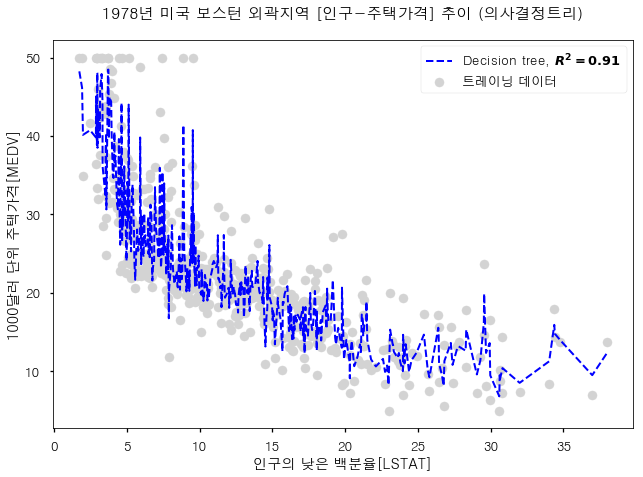

In [11]:
# 보스턴 외곽 지역 주택정보 14개 범주로 시작
# 회귀 분석 - 의사결정트리/랜덤포레스트

%matplotlib inline
#import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# 회귀 분석 - 선형 회귀
from sklearn.linear_model import LinearRegression

#회귀 분석 - 다항 회귀
from sklearn.preprocessing import PolynomialFeatures

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 회귀 분석 - 의사결정트리/랜덤포레스트
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


X = df[['LSTAT']].values
y = df['MEDV'].values

# 데이터 변형 기법
#X = np.log(X_log)
#y = np.sqrt(y_sqrt)

# 의사결정트리
#dt = DecisionTreeRegressor(max_depth=3)
dt = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

# 회귀 계산
dt.fit(X, y)

# 의사결정트리 회귀의 결과를 그래프로 표시하기 위해
# X의 요소값이 작은 순서로 정렬한 인덱스를 sort_idx로 둡니다.
sort_idx = X.ravel().argsort()

y_dt_pred = dt.predict(X[sort_idx])

# 단순 회귀 모델의 예측값 계산
mse_dt = mean_squared_error(y[sort_idx], y_dt_pred)
r2_dt = r2_score(y[sort_idx], y_dt_pred)

print('MSE\tDecision tree: %.2f' %(mse_dt))
print('R2\tDecision tree: %.2f' %(r2_dt))


plt.scatter(X[sort_idx], y[sort_idx], label='트레이닝 데이터', c='lightgray')

plt.plot(X[sort_idx], y_dt_pred, linestyle='--', label='Decision tree, $R^2=%.2f$' %r2_dt, c='blue', lw=2)

plt.xlabel('인구의 낮은 백분율[LSTAT]')
plt.ylabel('1000달러 단위 주택가격[MEDV]')
plt.title('1978년 미국 보스턴 외곽지역 [인구-주택가격] 추이 (의사결정트리)\n')
plt.legend()
plt.show()

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 